[link text](https://)### **Ultra-Fast-Lane-Detection**

In [1]:
!pip install paddlepaddle-gpu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 758.9/758.9 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.4 MB/s eta 0:00:00


In [2]:
pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 800.0/800.0 kB 11.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-

In [3]:
import os
import cv2
import paddle
import numpy as np
from tqdm import tqdm
from ultralytics import YOLO
import numpy as np
from shapely.geometry import Point, Polygon


In [15]:
!gdown --id '13ivMsNCh4A7IUgpKDJAY8kVxgmKU1NK7'

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=13ivMsNCh4A7IUgpKDJAY8kVxgmKU1NK7
From (redirected): https://drive.google.com/uc?id=13ivMsNCh4A7IUgpKDJAY8kVxgmKU1NK7&confirm=t&uuid=843c7e12-2144-4c55-8b36-bb8f1743a997
To: /content/ultra-lane.zip
100% 395M/395M [00:04<00:00, 81.8MB/s]


In [16]:
!unzip ultra-lane.zip

Archive:  ultra-lane.zip
   creating: pretrained_models/
   creating: pretrained_models/UFLD_Tusimple/
  inflating: pretrained_models/UFLD_Tusimple/__model__  
  inflating: pretrained_models/UFLD_Tusimple/__params__  
   creating: pretrained_models/UFLD_Culane/
  inflating: pretrained_models/UFLD_Culane/__model__  
  inflating: pretrained_models/UFLD_Culane/__params__  


In [17]:
'''
Default configurations
'''
Culane = {
    'model_path': '/content/pretrained_models/UFLD_Culane',
    'row_anchor':  [121, 131, 141, 150, 160, 170, 180, 189, 199,
                    209, 219, 228, 238, 248, 258, 267, 277, 287],
    'griding_num': 200,
    'cls_num_per_lane': 18
}

Tusimple = {
    'model_path': 'pretrained_models/UFLD_Tusimple',
    'row_anchor':  [64,  68,  72,  76,  80,  84,  88,  92,  96, 100, 104, 108, 112, 116,
                    120, 124, 128, 132, 136, 140, 144, 148, 152, 156, 160, 164, 168, 172,
                    176, 180, 184, 188, 192, 196, 200, 204, 208, 212, 216, 220, 224, 228,
                    232, 236, 240, 244, 248, 252, 256, 260, 264, 268, 272, 276, 280, 284],
    'griding_num': 100,
    'cls_num_per_lane': 56
}

In [18]:
mean=[0.485, 0.456, 0.406]
std=[0.229, 0.224, 0.225]
config=Culane

In [19]:
griding_num = config['griding_num']
row_anchor = config['row_anchor']
cls_num_per_lane = config['cls_num_per_lane']

mean = mean
std = std

col_sample = np.linspace(0, 800 - 1, config['griding_num'])
col_sample_w = col_sample[1] - col_sample[0]
idx = (paddle.arange( end=config['griding_num']) + 1).reshape((-1, 1, 1))

model = paddle.jit.load(
    path=config['model_path'], model_filename='__model__', params_filename='__params__')
yolo=YOLO("/content/yolov8n.pt")




0: 352x640 8 persons, 1 car, 2 buss, 1 truck, 9.6ms
Speed: 1.6ms preprocess, 9.6ms inference, 1.7ms postprocess per image at shape (1, 3, 352, 640)
phat hien lấn 
phat hien lấn 
phat hien lấn 
phat hien lấn 
phat hien lấn 
phat hien lấn 
phat hien lấn 
phat hien lấn 


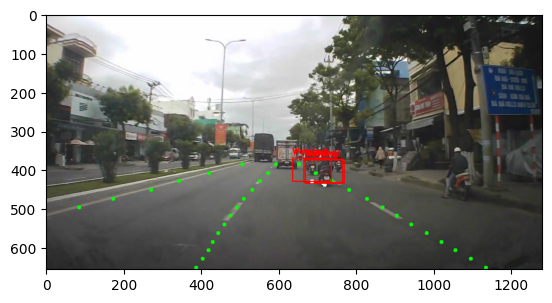

True

In [20]:
frame=cv2.imread("/content/15.png")
height,width,k=frame.shape
img = cv2.resize(frame, dsize=(800, 288),
                      interpolation=cv2.INTER_LINEAR)
img = img/255.0
img = (img-mean) / std
img = img.transpose((2, 0, 1))
img = img[np.newaxis, ...]
img = paddle.to_tensor(img, dtype='float32')
result=model(img)
All_Lane={"Lane1":[],"Lane2":[],"Lane3":[],"Lane4":[]}
result = result[0][:, ::-1, :]
prob = paddle.nn.functional.softmax(result[:-1, :, :], axis=0)
loc = paddle.sum(prob * idx, axis=0).numpy()
result = paddle.argmax(result, axis=0).numpy()
loc[result == griding_num] = 0
for i in range(loc.shape[1]):
    if np.sum(loc[:, i] != 0) > 2:
        for k in range(loc.shape[0]):
            if loc[k, i] > 0:
                x = int(loc[k, i] * col_sample_w * width / 800) - 1
                y = int(height * (row_anchor[cls_num_per_lane - 1 - k] / 288)) - 1
                point = (x, y)
                All_Lane[f"Lane{i+1}"].append(point)
                cv2.circle(frame, point, 5, (0, 255, 0), -1)
#lấn làn
results=yolo.predict(frame)
m=results[0].names
n=results[0].boxes.xywh
clss=results[0].boxes.cls
box=[]
h_box=[] #chieu cao box
#lấy tọa độ của box có xe máy
for i in range(len(clss)):
    t=clss[i].item()
    name=m[t]
    if(name == "person" or name == "motorbike"):
        temp=n[i]
        x=temp[0].item()
        y=temp[1].item()
        h=temp[2].item()
        w=temp[3].item()
        point=(int(x),int(y+h+20))
        box.append(point)
        h_box.append(h)

#xac dinh khung trước xe
left_lane_points = All_Lane['Lane2']
right_lane_points = All_Lane['Lane3']
lane_polygon = Polygon(All_Lane['Lane2'] + All_Lane['Lane3'][::-1])
# Tọa độ của xe máy
for  i in range(len(box)):
  motorbike_point=box[i]
  height_box=h_box[i]
  # xác định xem xe máy có lấn làn không
  motorbike_in_lane = lane_polygon.contains(Point(motorbike_point))
  motorbike_point_int = (int(motorbike_point[0]), int(motorbike_point[1]))
  if motorbike_in_lane:
        # tọa độ của khung cảnh báo
      top_left = (motorbike_point_int[0] - 50, motorbike_point_int[1] - 30-int(height_box))
      bottom_right = (motorbike_point_int[0] + 50, motorbike_point_int[1] + 30-int(height_box))
      cv2.circle(frame, motorbike_point_int, 5, (255, 255, 255), -1)

      # vẽ khung cảnh báo
      cv2.rectangle(frame, top_left, bottom_right, (0, 0, 255), 2)
      cv2.putText(frame, 'Warning!', (top_left[0], top_left[1] - 10),
                  cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

import matplotlib.pyplot as plt
image_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.show()
from PIL import Image
import PIL
cv2.imwrite("case_17.png", frame)